# 被动网络测量

网络运营商会查看不同类型的网络流量数据，以了解其网络的属性。有些网络数据可以直接从网络设备(例如路由器、交换机)中收集，而这些设备正在转发实时流量。收集这些数据不会影响网络行为，因此被称为“被动”网络测量(与“主动”测量相对)。

在本作业中，你将分析两种类型的被动网络测量数据——网络流量和BGP路由。

这个笔记本分为几个部分。你需要完成的部分被标记为TODO。

**请在下方填入你的姓名和学号:**

**姓名**
黄潇颖

**学号**
2020201622

## 背景

### 使用IPFIX进行流量测量

在大多数网络中，路由器使用[IPFIX protocol](https://en.wikipedia.org/wiki/IP_Flow_Information_Export)进行网络流量监测.[NetFlow](https://en.wikipedia.org/wiki/NetFlow)是IPFIX中由Cisco定义的一种专有形式, 在网络界很有名，因为Cisco为许多大型网络提供路由器。

在作业的这一部分，您将分析从一个校园网络到Internet的路由器捕获的NetFlow记录。作业将要求你执行类似于网络运营商会执行的分析：查询关于该校园网络中最流行的流量端点、最流行的网络应用程序等问题。(可以想象，当我们在之后的作业中开始考虑安全性时，分析这些数据的能力将会派上用场!)

NetFlow记录在文件夹中的'netflow.csv'文件中。为了简化分析，我们确保该校园网的IP地址以128.112开头，并对其16个低位进行匿名化处理，以保护校园网用户的隐私。为了进一步简化你的任务，我们将这些记录解析为CSV(逗号分隔的变量)格式，文件的第一行列出了字段的名称。(在真实网络中，路由器将IPFIX记录导出为二进制文件。)

### 使用BGP路由表测量域间路由

为了帮助网络运营商了解Internet路由的状态，许多路由器都有能力定期“转储”BGP路由表到一个静态文件中。这些路由表包含了每个IP前缀、路由器根据每个前缀学习到的所有BGP路由以及路由器最终选择的“最佳”BGP路由的信息。通过对BGP路由表的分析，可以了解不同IP前缀的流量的流向。

在这个作业中，我们提供了一个来自[RouteViews](http://www.routeviews.org/)项目的路由表转储。你可以访问这个网站来了解更多关于他们收集的路由表的信息。“telnet route-views2.routeviews.org”也会在一个真正的BGP路由器的routeviews项目中给你一个命令行提示符，如果你想把玩一个实时路由表视图的话。http://routeviews.org/bgpdata/ 有来自参与的路由器的定期二进制路由表转储和更新日志。同样，对于这次作业，我们将二进制路由表转储解析为一种更容易直接分析的格式。数据位于'bgp_rib.csv'文件中。

### 使用map()和reduce()进行功能性数据分析

本任务中的几个数据分析步骤使用了“MapReduce”编程模型。MapReduce起源于函数式编程语言，它使用了两个函数(称为“map()”和“reduce()”)来将函数应用于可迭代数据(如链表、数组等)。

##### map()

一般的'map()'函数有两个参数:另一个函数(它本身带一个参数)和一个可迭代对象。'map()'然后将参数函数应用到可迭代对象中的每一项。请参阅Python内置'map()'函数的文档了解更多细节:https://docs.python.org/2/library/functions.html#map 。下面的示例程序使用'map()'给列表的每个元素加3

In [1]:
some_numbers = [1,2,3]
three_more = map(lambda x: x+3, some_numbers)
print three_more

[4, 5, 6]


Map()经常与匿名函数(上例中的lambda)一起使用，但也可以很容易地与普通函数一起使用:

In [2]:
def add3(i):
    return i+3
 
some_numbers = [1,2,3]
three_more = map(add3, some_numbers)
print three_more

[4, 5, 6]


请注意，'map()'的实际实现允许映射函数接受多个参数或在一个闭包中包含更多信息，但在此作业中我们不需要这样做。

##### reduce()

一个一般的'reduce()'函数接受另一个函数(该函数本身接受*两个*参数)、一个可迭代对象和一个可选的初始值。参数函数应用于可迭代对象的前两个元素(或第一个元素和初始化器值)以获得返回值。然后将该函数应用于此返回值和可迭代对象中的下一项。这将继续遍历可迭代对象，直到只剩下一个返回值。这允许'reduce()'计算可迭代对象中所有数据的汇总。请参阅Python内置'reduce()'函数的文档了解更多细节:https://docs.python.org/2/library/functions.html#reduce 。下面的例子使用'reduce()'对整数列表中的'4'进行计数:

In [3]:
def count_4s(count, i):
    # The order of the arguments matters. 
    #     The first argument is the accumulated value
    #     The secod argument is next value from the iterable
    if i == 4:
        return count + 1
    else:
        return count

some_numbers = [1,4,0,1,4]
num_fours = reduce(count_4s, some_numbers, 0) # 0 is the initializer value 
print num_fours

2


同样，'reduce()'的实际实现允许reduce函数接受两个以上的参数或在一个闭包中包含更多信息，但在这次作业中我们不需要这样做。

[MapReduce](https://en.wikipedia.org/wiki/MapReduce)很受欢迎，因为它允许大数据集上的分析任务可以很容易地并行化。尽管有许多开源和私有的mapreduce风格的数据处理库(通常有不同的方式来表示可迭代数据集和在许多计算机上分配任务)，它们都涉及到'map()'和'reduce()'函数，就像你在这个作业中使用的一样。

## Part A: IPFIX Data

### 解析 IPFIX 数据

'netflow.csv'文件包含来自某个大学校园网络边界路由器的预处理netflow数据。数据是“未采样的”，也就是说，它为每个经过边界路由器任何接口的数据包编译流量统计。我们使用“nfdump”工具来处理路由器收集的原始NetFlow数据。'netflow.csv'文件的每一行，除了首行，记录了一个流的以下信息:

```
Date first seen, Time first seen (m:s), Date last seen, Time last seen (m:s), Duration (s), Protocol, 
Src IP addr, Src port, Dst IP addr, Dst port, Packets, Bytes, Flags, Input interface, Output interface		

```

要分析这些数据，我们首先需要将其读入一个python数据结构。下面的代码使用内置的'csv'库将'netflow.csv'读入字典列表。如果你感兴趣，可以在这里找到“csv”库文档:https://docs.python.org/2/library/csv.html

In [4]:
import csv

with open('netflow.csv', 'r') as netflow_file:
    netflow_reader = csv.DictReader(netflow_file)
    netflow_data = list(netflow_reader)
    
print "Number of flow records: {}".format(len(netflow_data))
print
print "Sample flow record: {}".format(netflow_data[0])

Number of flow records: 105360

Sample flow record: {'Dst IP addr': '128.112.213.189', 'Protocol': 'ICMP', 'Bytes': '94', 'Src port': '0', 'Src IP addr': '172.16.241.1', 'Input interface': '120', 'Packets': '1', 'Date first seen': '10/29/15', 'Output interface': '0', 'Duration (s)': '0', 'Time first seen (m:s)': '04:48.9', 'Flags': '.A....', 'Time last seen (m:s)': '04:48.9', 'Dst port': '11', 'Date last seen': '10/29/15'}


### 分析 IPFIX 数据

以下各部分都侧重于使用准备好的netflow数据回答一些特定的问题。这些问题都是真正的网络运营商感兴趣的，可能会揭示一些关于一个校园网络的使用者们如何使用互联网的令人惊讶的事实。

#### 该校园网络用户访问最多的IP地址是什么?

为了回答这个问题，我们必须决定如何衡量IP地址的普及程度。所有流的总流量似乎是一个合理的选项，流的个数则是另一个合理的指标。网络运营商实际上同时使用这两种指标(以及其他指标)，我们在本作业中也将这么做。

*Step 1: 根据流的数量确定最流行的IP地址*

完成以下代码来生成一个python字典'ips_by_flows'，其中包含'netflow_data'中每个外部(不是以128.112.开头的)IP地址的总流量的计数。字典的键应该是IP地址，值应该是该ip地址的流的计数。

首先完成'count_by_flows()'函数，该函数应该接受一个具有上述形式的字典，然后从'current_flow'中读取数据，并适当地对该字典进行更新。如果你对数据类型感到困惑，可以使用print语句检查变量。

你可能希望创建一个额外的helper函数来测试IP地址是否以128.112开头。有用的字符串方法记录在这里:https://docs.python.org/2/library/stdtypes.html#string-methods。

然后需要使用'reduce()'函数来构建一个字典结果。作为提示，'reduce()'的初始化器参数应该是'defaultdict(lambda: 0)'。[defaultdict()](https://docs.python.org/2/library/collections.html#collections.defaultdict)函数创建一个带有默认值的字典，默认值是参数函数的输出(在本例中，这允许你增加特定键的值，而不需要首先检查键是否已经在字典中(如果你使用'{}'而不是' defaultdict() '创建字典，这将引发KeyError)。

提供的代码将打印和绘制最流行的ip。`check_ips_by_flows()`函数将比较您的答案的前15个最流行的ip的md5哈希值与正确答案的md5哈希值。这将打印一条消息，让您知道您是正确的还是需要继续调试。

Most popular IP addresses by number of flows: [('116.211.0.90', 17015), ('169.54.233.126', 9424), ('163.53.247.3', 2981), ('169.45.161.189', 2494), ('222.186.190.71', 2413)]

Hashes match. Your ips_by_flows is correct.


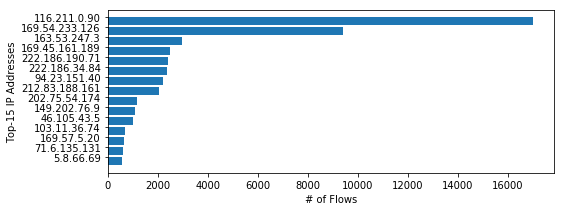

In [5]:
%matplotlib inline
from collections import defaultdict
from plotting import plot_flows
from testing import check_ips_by_flows

# TODO: complete count_by_flows function
def is_right_header(addr):
    return addr.startswith('128.112')

def count_by_flows(counts, current_flow):
    # counts is the current dict result
    # current_flow being processed
    dst_ip=current_flow['Dst IP addr']
    src_ip=current_flow['Src IP addr']
    
    if not is_right_header(dst_ip):
        counts[dst_ip]+=1
    if not is_right_header(src_ip):
        counts[src_ip]+=1
    return counts
      

# TODO: use reduce() function to apply count_by_flows to netflow_data and assign the result to ips_by_flows
ips_by_flows = reduce(count_by_flows, netflow_data, defaultdict(lambda: 0))

# print the top 5 IP addresses by number of flows 
sorted_ips_by_flows = sorted(ips_by_flows.items(), reverse=True, key=lambda x: x[1])
print "Most popular IP addresses by number of flows: {}\n".format(sorted_ips_by_flows[0:5])

# check the results
check_ips_by_flows(sorted_ips_by_flows[0:15])

# plot the results
plot_flows(sorted_ips_by_flows)

*Step 2: 根据总流量确定最流行的IP地址*

完成以下代码来生成一个字典'ips_by_volume'，其中包含每个外部(非该校园网)IP地址的总字节数。字典的键应该是IP地址，值应该是一个表示字节计数的整数。记住，'netflow_data'中的值是字符串。你需要将它们转换为整数来进行运算。

Most popular IP addresses by volume: [('212.83.188.161', 928311), ('169.54.233.126', 867928), ('116.211.0.90', 680600), ('169.45.161.189', 229448), ('42.120.221.22', 191958)]

Hashes match. Your ips_by_volume is correct.


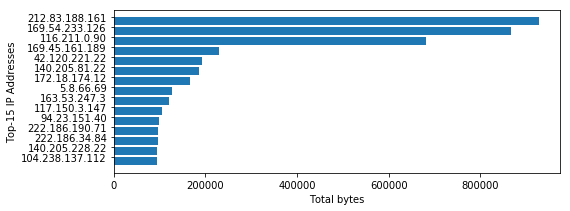

In [6]:
%matplotlib inline
from plotting import plot_volumes
from testing import check_ips_by_volume

# TODO: complete count_by_volume function
def count_by_volume(counts, current_flow):
    # counts is the current dict result
    # current_flow being processed
    dst_ip=current_flow['Dst IP addr']
    src_ip=current_flow['Src IP addr']
    byts=int(current_flow['Bytes'])
    
    if not is_right_header(dst_ip):
        counts[dst_ip]+=byts
    if not is_right_header(src_ip):
        counts[src_ip]+=byts
    return counts

        
# TODO: use reduce() function to apply count_by_volume to netflow_data and assign the result to ips_by_volume
ips_by_volume = reduce(count_by_volume, netflow_data, defaultdict(lambda: 0))

# print the top 5 IP addresses by volume
sorted_ips_by_volume = sorted(ips_by_volume.items(), reverse=True, key=lambda x: x[1])
print "Most popular IP addresses by volume: {}\n".format(sorted_ips_by_volume[0:5])

# check the results
check_ips_by_volume(sorted_ips_by_volume[0:15])

# plot the results
plot_volumes(sorted_ips_by_volume)

#### 该校园网络用户最流行的应用程序(按协议)是什么?

你认为一个校园网络上最常见的应用协议是什么?Web流量(HTTP和SSL)?安全远程连接(SSH)?电子邮件(SMTP, IMAP, POP3)?在实践中，网络运营商可能希望识别流行的应用程序，以制定供应计划或更改网络配置，以区别对待来自不同应用程序的流量(例如，路由不同链路上的流量)。这可以防止高容量应用程序(例如视频流)影响关键的低容量应用程序的性能。

你可以通过在netflow数据中根据流量的端口来回答这些问题。许多应用程序协议使用众所周知的固定端口进行通信。例如，HTTP流量发生在端口80上，SSL流量发生在端口443上，SSH流量发生在端口22上，SMTP流量发生在端口25上。

我们将再次使用流的数目和总流量作为度量端口“流行度”的指标。

Complete the following code to create `ports_by_flows` and `ports_by_volume` dicts from the netflow data.  Use the same strategy as you did above to create `ips_by_flows` and `ips_by_volume`. 

Include all destination ports and source ports **lower than 1024** (ports lower than 1024 are "well-known" and easily mapped to applications). 

完成以下代码，从netflow数据创建'ports_by_flows'和'ports_by_volume'字典。使用与上面创建'ips_by_flows'和'ips_by_volume'相同的策略。

统计所有的**低于1024的**(低于1024的端口是“众所周知的”)目的端口和源端口

Most popular ports by number of flows: [('23', 19546), ('53', 6480), ('80', 6352), ('443', 5788), ('0', 4712)]
Most popular ports by volume: [('23', 2324852), ('53', 1437375), ('161', 752840), ('0', 509011), ('80', 309148)]

Hashes match. Your ports_by_flows is correct.
Hashes match. Your ports_by_volume is correct.


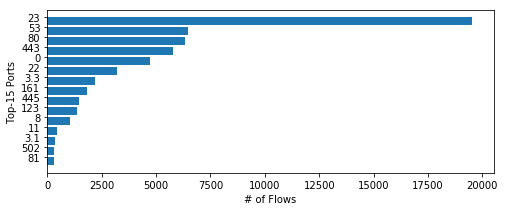

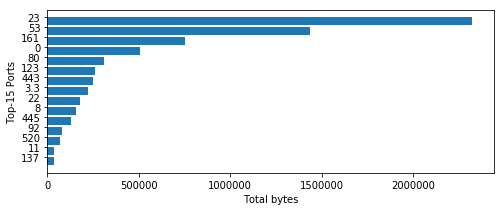

In [7]:
%matplotlib inline
from plotting import plot_ports
from testing import check_ports_by_flows, check_ports_by_volume

def is_lower_1024(port):
    #port type:string
    return float(port)<1024

# TODO: create ports_by_flows and ports_by_volume dicts from netflow_data
def count_by_flows_port(counts, current_flow):
    # counts is the current dict result
    # current_flow being processed
    dst_ip=current_flow['Dst port']
    src_ip=current_flow['Src port']
    
    if  is_lower_1024(dst_ip):
        counts[dst_ip]+=1
    if  is_lower_1024(src_ip):
        counts[src_ip]+=1
    return counts

def count_by_volume_port(counts, current_flow):
    # counts is the current dict result
    # current_flow being processed
    dst_ip=current_flow['Dst port']
    src_ip=current_flow['Src port']
    
    byts=int(current_flow['Bytes'])
    
    if  is_lower_1024(dst_ip):
        counts[dst_ip]+=byts
    if  is_lower_1024(src_ip):
        counts[src_ip]+=byts
    return counts

ports_by_flows = reduce(count_by_flows_port, netflow_data, defaultdict(lambda: 0))
ports_by_volume = reduce(count_by_volume_port, netflow_data, defaultdict(lambda: 0))


# Print the most popular ports and check the results
sorted_ports_by_flows = sorted(ports_by_flows.items(), reverse=True, key=lambda x: x[1])
sorted_ports_by_volume = sorted(ports_by_volume.items(), reverse=True, key=lambda x: x[1])
print "Most popular ports by number of flows: {}".format(sorted_ports_by_flows[0:5])
print "Most popular ports by volume: {}\n".format(sorted_ports_by_volume[0:5])
check_ports_by_flows(sorted_ports_by_flows[0:15])
check_ports_by_volume(sorted_ports_by_volume[0:15])

# plot the results 
plot_ports(sorted_ports_by_flows, sorted_ports_by_volume)

#### 扩展分析
1. 流的持续时间是怎样分布的？请画出图
2. 不同应用所发送的数据量是怎样的？请画出图

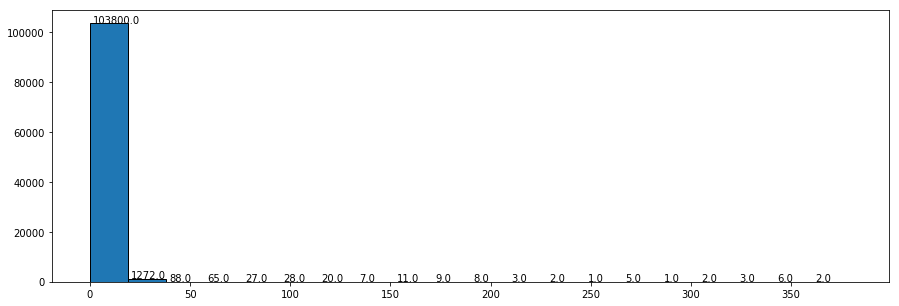

In [8]:
#流的持续时间分布图像 Duration (s)
import matplotlib.pyplot as plt

duations=[float(x['Duration (s)']) for x in netflow_data]

plt.figure(figsize=(15,5))
nums,bins,patches=plt.hist(duations,bins=20,edgecolor='k')
for num,bin in zip(nums,bins):
    plt.annotate(num,xy=(bin,num),xytext=(bin+1.5,num+0.5))
plt.show()


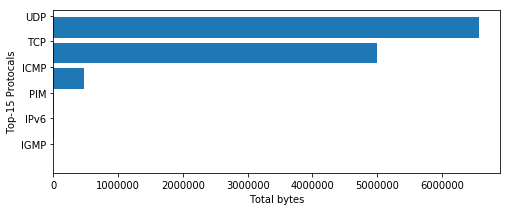

In [9]:
# 不同应用所发送的数据量
from plotting import plot_bar

def count_by_volume_protocal(counts, current_flow):
    # counts is the current dict result
    # current_flow being processed
    protocal=current_flow['Protocol']
    byts=int(current_flow['Bytes'])

    counts[protocal]+=byts
    
    return counts

protocal_by_volume = reduce(count_by_volume_protocal, netflow_data, defaultdict(lambda: 0))
sorted_protocal_by_volume = sorted(protocal_by_volume.items(), reverse=True, key=lambda x: x[1])

def plot_protocal(protocal_vol, k=15):
    plot_bar(protocal_vol[0:k], 'Top-{} Protocals'.format(k), "Total bytes")

plot_protocal(sorted_protocal_by_volume)

## Part B: 分析BGP路由表

到目前为止，我们已经研究了IP地址和端口级别的流量，但是网络运营商可能也有兴趣探索其他哪些网络负责向网络发送或接收流量。运营商可能会关心哪些AS正在发送流量!这些信息对于探索各种网络攻击(例如，拒绝服务攻击)可能很有用，我们将在下一个作业中探索。

RouteViews项目允许网络运营商从互联网上几个不同自治系统的角度获得关于全球路由系统的实时信息。RouteViews服务器充当BGP软件路由器，通过BGP会话获取它们的BGP路由信息，就像其他路由器学习BGP路由一样。RouteViews服务器与其他BGP-speaking路由器的主要区别在于，RouteViews服务器不转发任何真实的Internet流量。

RouteViews会定期记录BGP路由表(有时称为路由信息库(routing Information Base, RIB))的二进制日志，这种二进制日志被称为MRT。我们从一个这样的服务器收集数据，并使用“bgpdump”工具将数据解析为更可读的输出格式。BGP RIB表中的条目如下所示:
```
TIME: 03/07/16 02:00:00
TYPE: TABLE_DUMP_V2/IPV4_UNICAST
PREFIX: 0.0.0.0/0
SEQUENCE: 0
FROM: 185.44.116.1 AS47872
ORIGINATED: 03/06/16 20:27:05
ORIGIN: IGP
ASPATH: 47872 3356
NEXT_HOP: 185.44.116.1
COMMUNITY: 3356:2 3356:514 3356:2087 47872:1 47872:3356

TIME: 03/07/16 02:00:00
TYPE: TABLE_DUMP_V2/IPV4_UNICAST
PREFIX: 0.0.0.0/0
SEQUENCE: 0
FROM: 80.241.176.31 AS20771
ORIGINATED: 03/04/16 10:21:21
ORIGIN: IGP
ASPATH: 20771 1299
NEXT_HOP: 80.241.176.31
```

“BGP RIBs”对同一个IP地址前缀可能有多个入口。

在本作业中，我们只考虑一个IP地址的一个入口. 我们已经把路由表数据转换成了csv文件`bgp_rib.csv`。每一行包含以下数据：
```
TIME, ORIGIN, FROM, SEQUENCE, ASPATH, PREFIX, NEXT_HOP
```

下面的代码将'bgp_rib.csv'文件导入到字典列表中(就像我们对上面的'netflow_data'所做的那样)。

In [10]:
import csv

with open('bgp_rib.csv', 'r') as bgp_file:
    bgp_reader = csv.DictReader(bgp_file,delimiter=";")
    bgp_data = list(bgp_reader)
    
print "Number of BGP RIBs: {}".format(len(bgp_data))
print
print "Sample BGP RIB: {}".format(bgp_data[0])

Number of BGP RIBs: 208272

Sample BGP RIB: {'ORIGIN': 'IGP', 'FROM': '80.249.208.200 AS12859', 'SEQUENCE': '0', 'ASPATH': '12859 3257 4637 1221 38803 56203', 'PREFIX': '1.0.4.0/24', 'NEXT_HOP': '80.249.208.200', 'TIME': '03/07/16 00:00:00'}


#### BGP RouteViews数据中最长的路由是哪条(根据路由中无重复的AS的个数)?

要回答这个问题，你需要根据“ASPATH”字段中无重复的AS号的数量对“bgp_data”排序。

完成下面的代码，找到最长的ASPATH，并将其赋值给'longest_aspath'变量。你可以使用Python内置的'sorted()'函数(https://docs.python.org/2/library/functions.html#sorted)或选择其他方法。

In [11]:
from testing import check_longest_aspath

# TODO: Find the longest (by number of *unique* AS numbers) ASPATH and assign it to the 'longest_aspath' variable
def get_hub_num(aspath):
    #aspath string
    return len(set(aspath.split(' ')))

longest_len=0
longest_aspath={}

for bgp in bgp_data:
    now_len=get_hub_num(bgp['ASPATH'])
    if now_len > longest_len:
        longest_len=now_len
        longest_aspath=bgp['ASPATH']


# print and check the longest ASPATH
print "The longest ASPATH is: {}\n".format(longest_aspath)
check_longest_aspath(longest_aspath)

The longest ASPATH is: 20562 9002 9198 12997 51346 24722 8449 3356 38193 55330 131284 131284 131284 131284 131284 131284 131284 131284 131284 131284 58630

Hashes match. Your longest_aspath is correct.


## 注意！

**在退出该notebook之前确保你的更改已经保存！(右上角的Save and Checkpoint图标按钮， 或者'Ctrl-S')**